K: 2, SSE = 152.34795176035803
K: 3, SSE = 78.85566582597723
K: 4, SSE = 57.3838732654949
K: 5, SSE = 50.291946349273864
K: 6, SSE = 45.819121510673256
K: 7, SSE = 40.416438933873145
K: 8, SSE = 30.06459307359309
K: 9, SSE = 31.500894938394936
K: 10, SSE = 26.725581281291802


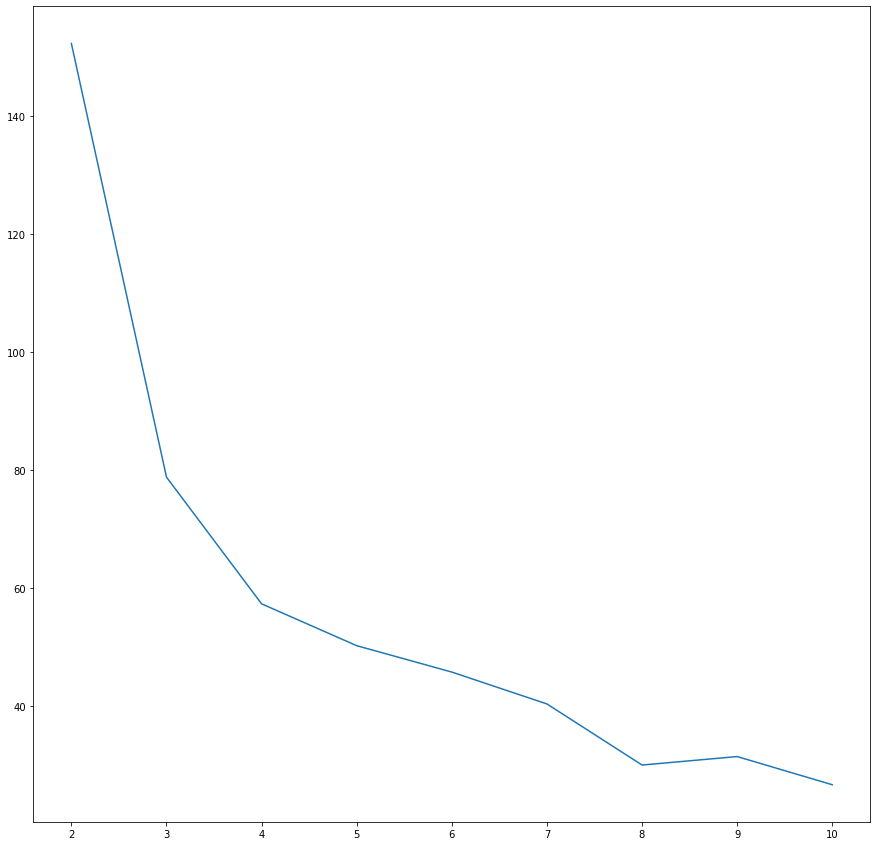

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
class kMeans():
  def __init__(self, dimension, k):
    self._dimension = dimension
    self._clusters = k
    self._prototypes = np.zeros((k, dimension))

  def __sample_with_prob(self, sample_space, probability, num_samples=1):
    idx = [i for i in range(sample_space.shape[0])]
    pos = np.random.choice(idx, p=probability)

    return sample_space[pos]

  def __initialize_prototypes(self, X):
    probs = None
    center = self.__sample_with_prob(X, probs)
    self._prototypes[0, :] = center

    for i in range(1, self._clusters):
      probs = self.__nearest_cluster_dist(X, i)
      probs = [j ** 2 for j in probs]
      tot = sum(probs)
      probs = [j/tot for j in probs]
      center = self.__sample_with_prob(X, probs)
      self._prototypes[i, :] = center

  def __nearest_cluster_dist(self, X, i=None, clust_assign=False):
    if i is not None:
      prototypes = self._prototypes[0:i, :]
    else:
      prototypes = self._prototypes
    dists = list()
    for x in X:
      temp = []
      for cluster in prototypes:
        temp.append(np.linalg.norm(x - cluster))
      if clust_assign:
        dists.append(np.argmin(temp))
      else:
        dists.append(np.min(temp))
    return dists

  def __cluster_means(self, X, c):
    c = np.array(c)
    centroids = np.zeros(self._prototypes.shape)
    for k in range(self._clusters):
      cluster_group = X[c == k, :]
      centroids[k, :] = cluster_group.mean(axis=0)
    return centroids

  def __SSE(self, X, c):
    err = 0
    for i, x in enumerate(X):
      err += np.linalg.norm(x - self._prototypes[c[i]]) ** 2
    return err

  def fit(self, X, max_iterations=3000):
    self.__initialize_prototypes(X)
    current = self._prototypes

    for i in range(max_iterations):
      c = self.__nearest_cluster_dist(X, clust_assign=True)
      centroids = self.__cluster_means(X, c)
      
      if np.array_equal(centroids, self._prototypes):
        return self.__SSE(X, c)

      self._prototypes = centroids
    
    print(f"Reached Max Iterations but not converged.")
    return self.__SSE(X, c)


X, _ = load_iris(return_X_y=True)
SSE = list()

for k in range(2, 11):
  model = kMeans(X.shape[1], k)
  err = model.fit(X)
  SSE.append(err)
  print(f"K: {k}, SSE = {err}")

plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)  

K: 2, SSE = 152.34795176035792
K: 3, SSE = 78.85144142614601
K: 4, SSE = 57.228473214285714
K: 5, SSE = 46.472230158730156
K: 6, SSE = 39.054977867477874
K: 7, SSE = 34.3431679723785
K: 8, SSE = 30.186555194805194
K: 9, SSE = 28.381281385281387
K: 10, SSE = 26.06887019508587


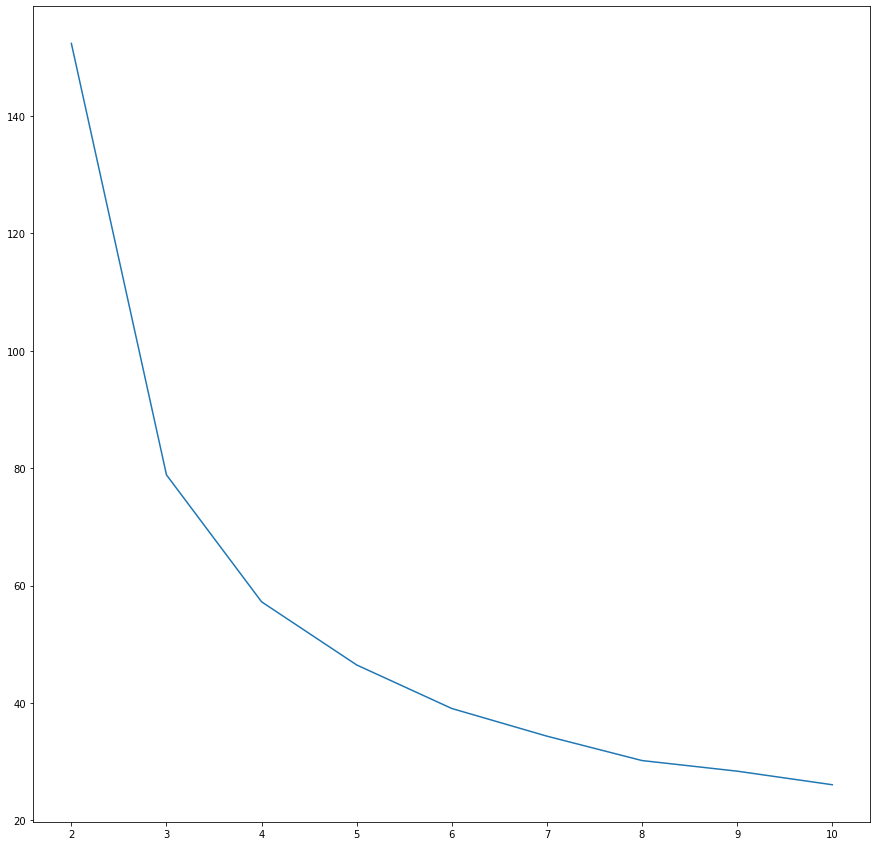

In [2]:
SSE = list()

for k in range(2, 11):
  model = KMeans(n_clusters=k, random_state=13, max_iter=3000).fit(X)
  sse = model.inertia_
  SSE.append(sse)
  print(f"K: {k}, SSE = {sse}")

plt.figure(figsize=(15, 15))
plt.plot([i for i in range(2, 11)], SSE)